# ClioMakeUp Survey Data Analysis

## Dataframe preparation

### Read Excel response file and do initial cleanup

In [1]:
import pandas as pd
from IPython.display import display

pd.set_option('display.max_columns', 7)

In [2]:
# Read response file
response_file = '../data/risposte.xlsx'
df = pd.read_excel(response_file)

# Remove timestamps
df = df.drop(df.columns[0], axis=1)
df

,Hai mai acquistato prodotti di ClioMakeUp?,Con che frequenza acquisti da ClioMakeUp? (Sia nell'e-commerce che negli store),Dove effettui gli acquisti?,...,Dove vivi?,In quale provincia vivi?,Per chi acquisti i prodotti di ClioMakeUp?
0,Si,da 1 a 2 volte l'anno,"E-commerce, PopUp Store",...,Italia,Alessandria,"Me, Famiglia, Amic*"
1,No,NaN,NaN,...,Italia,Alessandria,NaN
2,No,NaN,NaN,...,Italia,Alessandria,NaN
3,Si,da 1 a 2 volte l'anno,ClioMakeUp Experience Store,...,Italia,Alessandria,Me
4,Si,da 5 a 6 volte l'anno,E-commerce,...,Italia,Ancona,Me
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,Italia,VE,NaN
325,Si,da 1 a 2 volte l'anno,E-commerce,...,Italia,Tv,Me
326,No,NaN,NaN,...,Italia,Vicenza,NaN
327,No,NaN,NaN,...,Italia,Rovigo,NaN


In [3]:
# Rename headers
headers = ['Customer',
           'Frequency',
           'PurchaseLocation',
           'BrandKnownFor',
           'LastPurchase',
           'AllPurchases',
           'Satisfaction',
           'Gender',
           'Age',
           'Education',
           'Profession',
           'PlaceOfResidence',
           'Province',
           'SelfOrOthers'
]
df.columns = headers
df

,Customer,Frequency,PurchaseLocation,...,PlaceOfResidence,Province,SelfOrOthers
0,Si,da 1 a 2 volte l'anno,"E-commerce, PopUp Store",...,Italia,Alessandria,"Me, Famiglia, Amic*"
1,No,NaN,NaN,...,Italia,Alessandria,NaN
2,No,NaN,NaN,...,Italia,Alessandria,NaN
3,Si,da 1 a 2 volte l'anno,ClioMakeUp Experience Store,...,Italia,Alessandria,Me
4,Si,da 5 a 6 volte l'anno,E-commerce,...,Italia,Ancona,Me
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,Italia,VE,NaN
325,Si,da 1 a 2 volte l'anno,E-commerce,...,Italia,Tv,Me
326,No,NaN,NaN,...,Italia,Vicenza,NaN
327,No,NaN,NaN,...,Italia,Rovigo,NaN


### Clean up column by column

In [4]:
# Function to:
# - set 'category' data type for the column
# - define the complete list of categories (even those that never appear in the data) and their order
# - rename the categories from Italian to English
def fill_rename_categories(s, categories):
    # Set categorical dtype
    s = s.astype('category')

    # Set categories, define unused and define order
    s = s.cat.set_categories(list(categories.keys()), ordered=True)

    # Translate to English
    s = s.cat.rename_categories(categories)

    return s

# Function to check all the answers reported in the data for a column (a question) againsts a list of valid answers
def check_spurious_values(s, value_list, multiple=False):
    # If an entry can contain multiple values, split them
    if multiple:
        s = s.str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')
        s = s.explode(column)
    
    # Compare values in the column with valid values
    vc = s.value_counts()
    column_values = vc.index
    valid = ['Ok' if value in value_list else 'Invalid' for value in column_values]

    display(pd.DataFrame({'Occurrences': vc, 'Valid': valid}))
    

#### Customer

In [5]:
column = 'Customer'
categories = {
    'Si': 'Yes',
    'No': 'No',
}
df[column] = fill_rename_categories(df[column], categories)

#### Frequency

In [6]:
column = 'Frequency'
categories = {
    "da 1 a 2 volte l'anno": "1-2 times a year",
    "da 3 a 4 volte l'anno": "3-4 times a year",
    "da 5 a 6 volte l'anno": "5-6 times a year",
    "da 7 a 8 volte l'anno": "7-8 times a year",
    "più di 9 volte l'anno": "> 9 times a year",
}
df[column] = fill_rename_categories(df[column], categories)

#### PurchaseLocation
The question contains the 'Other' option, so we need to check and correct spurious values.

In [7]:
column = 'PurchaseLocation'
categories = ['E-commerce', 'PopUp Store', 'ClioMakeUp Experience Store']

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
E-commerce,104,Ok
PopUp Store,48,Ok
ClioMakeUp Experience Store,12,Ok
On-line,1,Invalid


In [8]:
# Clean data (change spurious 'On-line' to 'E-commerce')
df[column] = df[column].str.replace('On-line', 'E-commerce')
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
E-commerce,105,Ok
PopUp Store,48,Ok
ClioMakeUp Experience Store,12,Ok


In [9]:
# Create new column to group online and offline channels
s = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')
s = s.explode()
s = s.str.replace('PopUp Store', 'Offline store')
s = s.str.replace('ClioMakeUp Experience Store', 'Offline store')
df['PurchaseChannel'] = s.groupby(s.index).agg(list).map(lambda x: list(set(x)))
df

,Customer,Frequency,PurchaseLocation,...,Province,SelfOrOthers,PurchaseChannel
0,Yes,1-2 times a year,"E-commerce, PopUp Store",...,Alessandria,"Me, Famiglia, Amic*","[Offline store, E-commerce]"
1,No,NaN,NaN,...,Alessandria,NaN,[nan]
2,No,NaN,NaN,...,Alessandria,NaN,[nan]
3,Yes,1-2 times a year,ClioMakeUp Experience Store,...,Alessandria,Me,[Offline store]
4,Yes,5-6 times a year,E-commerce,...,Ancona,Me,[E-commerce]
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,VE,NaN,[nan]
325,Yes,1-2 times a year,E-commerce,...,Tv,Me,[E-commerce]
326,No,NaN,NaN,...,Vicenza,NaN,[nan]
327,No,NaN,NaN,...,Rovigo,NaN,[nan]


#### BrandKnownFor

In [10]:
column = 'BrandKnownFor'
categories = {
    'Meno di un anno':                          'less than 1 year',
    '1 anno':                                   '1 year',
    '2 anni':                                   '2 years',
    '3 anni':                                   '3 years',
    '4 anni':                                   '4 years',
    '5 anni (dal lancio dei primi rossetti)':   '5 years (first lipstick launch)',
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
5 anni (dal lancio dei primi rossetti),96,Ok
2 anni,12,Ok
4 anni,9,Ok
3 anni,8,Ok
1 anno,4,Ok
Meno di un anno,3,Ok
Da molto più di 5 anni,1,Invalid


In [11]:
# Clean data
df[column] = df[column].str.replace('Da molto più di 5 anni', '5 anni (dal lancio dei primi rossetti)')
check_spurious_values(df[column], categories)

,Occurrences,Valid
5 anni (dal lancio dei primi rossetti),97,Ok
2 anni,12,Ok
4 anni,9,Ok
3 anni,8,Ok
1 anno,4,Ok
Meno di un anno,3,Ok


In [12]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### LastPurchase
This data is used to derive the average receipt amount for each customer

In [13]:
column = 'LastPurchase'
# Define price dictionary
prices_dict = {
    'WonderMousse (Mousse viso detergente e struccante)':   15.50,
    'SuperStrucco (Balsamo detergente e struccante)':       24.50,
    'Kit doppia detersione (WonderMousse + SuperStrucco)':  35.00,
    'Paciocchi (Maschera occhi)':                           6.50,
    'Kit Paciocchi 5+1':                                    32.50,
    'Fondotinta OhMyLove':                                  28.50,
    'Correttore OhMyLove':                                  17.50,
    'Blush CuteLove':                                       15.50,
    'Illuminante CosmicLove':                               16.50,
    'Matite Sopracciglia AllDayLov Brow':                   12.50,
    'Ombretti liquidi SweetieLove':                         14.50,
    'Ombretti cremosi SweetieLove':                         14.50,
    'Mascara DarkLove':                                     14.50,
    'Eyeliner DeepLove':                                    14.50,
    'Matita occhi AllDayLove':                              10.50,
    'Palette BeautyLove':                                   57.50,
    'Palette FirstLove':                                    32.50,
    'Palette MyFirstLove ( 4 ombretti)':                    5.50,
    'Ombretti ClioMakeUp Eyeshadow':                        6.50,
    'Ultrabalm Passion (Limited Edition)':                  15.50,
    'Ultrabalm CoccoLove':                                  15.50,
    'Lip balm colorati CoccoLove':                          12.50,
    'Rossetti liquidi LiquidLove':                          13.50,
    'Rossetti cremosi CreamyLove':                          12.50,
    'Pennelli':                                             22.00,
}
# Create new column with receipt amount
new_column = 'ReceiptAmount'
df[new_column] = df[column].map(lambda item: sum([prices_dict[i.strip()] for i in item.split(',') if i.strip() in prices_dict]), na_action='ignore')
df

,Customer,Frequency,PurchaseLocation,...,SelfOrOthers,PurchaseChannel,ReceiptAmount
0,Yes,1-2 times a year,"E-commerce, PopUp Store",...,"Me, Famiglia, Amic*","[Offline store, E-commerce]",13.5
1,No,NaN,NaN,...,NaN,[nan],NaN
2,No,NaN,NaN,...,NaN,[nan],NaN
3,Yes,1-2 times a year,ClioMakeUp Experience Store,...,Me,[Offline store],13.5
4,Yes,5-6 times a year,E-commerce,...,Me,[E-commerce],45.5
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,NaN,[nan],NaN
325,Yes,1-2 times a year,E-commerce,...,Me,[E-commerce],13.5
326,No,NaN,NaN,...,NaN,[nan],NaN
327,No,NaN,NaN,...,NaN,[nan],NaN


In [14]:
# Create receipt groups
df['ReceiptAmountGroup'] = pd.cut(df['ReceiptAmount'], [0, 20, 40, 60, 80, 1000], labels=['<20€', '20-40€', '40-60€', '60-80€', '>80€'])
df['ReceiptAmountGroup'].value_counts().sort_index()
df

,Customer,Frequency,PurchaseLocation,...,PurchaseChannel,ReceiptAmount,ReceiptAmountGroup
0,Yes,1-2 times a year,"E-commerce, PopUp Store",...,"[Offline store, E-commerce]",13.5,<20€
1,No,NaN,NaN,...,[nan],NaN,NaN
2,No,NaN,NaN,...,[nan],NaN,NaN
3,Yes,1-2 times a year,ClioMakeUp Experience Store,...,[Offline store],13.5,<20€
4,Yes,5-6 times a year,E-commerce,...,[E-commerce],45.5,40-60€
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,[nan],NaN,NaN
325,Yes,1-2 times a year,E-commerce,...,[E-commerce],13.5,<20€
326,No,NaN,NaN,...,[nan],NaN,NaN
327,No,NaN,NaN,...,[nan],NaN,NaN


#### AllPurchases

In [15]:
column = 'AllPurchases'
categories = list(prices_dict.keys())

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Rossetti liquidi LiquidLove,76,Ok
Rossetti cremosi CreamyLove,67,Ok
Mascara DarkLove,62,Ok
Correttore OhMyLove,48,Ok
Ombretti cremosi SweetieLove,42,Ok
Fondotinta OhMyLove,31,Ok
Lip balm colorati CoccoLove,31,Ok
Eyeliner DeepLove,29,Ok
Matita occhi AllDayLove,29,Ok
Blush CuteLove,22,Ok


In [16]:
# Clean data
df[column] = df[column].str.replace('passion', 'Passion')
check_spurious_values(df[column], categories, multiple=True)
# Turn single strings into list of strings
df[column] = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')

,Occurrences,Valid
Rossetti liquidi LiquidLove,76,Ok
Rossetti cremosi CreamyLove,67,Ok
Mascara DarkLove,62,Ok
Correttore OhMyLove,48,Ok
Ombretti cremosi SweetieLove,42,Ok
Fondotinta OhMyLove,31,Ok
Lip balm colorati CoccoLove,31,Ok
Eyeliner DeepLove,29,Ok
Matita occhi AllDayLove,29,Ok
Blush CuteLove,22,Ok


#### Satisfaction

In [17]:
column = 'Satisfaction'
categories = {
    "Assolutamente si":     "Definitely yes",
    "Sì":                   "Yes",
    "Sì, ma non di tutti":  "Yes, but not all",
    "No":                   "No",
    "Assolutamente no":     "Definitely no",
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
Assolutamente si,56,Ok
Sì,44,Ok
"Sì, ma non di tutti",28,Ok
No,3,Ok
Assolutamente no,2,Ok


No invalid answers, so we just set the categories. Nothing to correct.

In [18]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Gender

In [19]:
column = 'Gender'
categories = {
    "Maschio":  "Male",
    "Femmina":  "Female",
    "Altro":    "Other",
}
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Age

In [20]:
column = 'Age'
# Just set the data type as integer
df[column] = df[column].astype('int')

#### Education

In [21]:
column = 'Education'
categories = {
    "Licenza media":                        "Middle school",
    "Scuola secondaria di secondo grado":   "High school",
    "Laurea triennale":                     "Bachelor's degree",
    "Laurea magistrale":                    "Master's degree",
    "Master":                               "Postgraduate specialisation",
    "Dottorato di ricerca":                 "PhD",
}

# Check valid answers
check_spurious_values(df[column], categories)

,Occurrences,Valid
Scuola secondaria di secondo grado,114,Ok
Laurea triennale,107,Ok
Laurea magistrale,71,Ok
Master,20,Ok
Licenza media,11,Ok
Dottorato di ricerca,4,Ok
Acconciatura,1,Invalid
"Estetista, onicotenica",1,Invalid


We make some assumptions on the education for the two invalid answers so we can still use those entries.

In [22]:
# Clean data
df[column] = df[column].str.replace('Acconciatura', 'Licenza media')
index = df[df[column].str.contains('Estetista, onicotenica')].index[0]
df.at[index, column] = 'Scuola secondaria di secondo grado'
check_spurious_values(df[column], categories)

,Occurrences,Valid
Scuola secondaria di secondo grado,115,Ok
Laurea triennale,107,Ok
Laurea magistrale,71,Ok
Master,20,Ok
Licenza media,12,Ok
Dottorato di ricerca,4,Ok


In [23]:
# Set categories
df[column] = fill_rename_categories(df[column], categories)

#### Profession

In [24]:
column = 'Profession'
categories = {
    "Studente":                                     "Student",
    "Stagista":                                     "Intern",
    "Lavoratore autonomo":                          "Self-employed",
    "Lavoratore dipendente a tempo determinato":    "Employed (fixed-term contract)",
    "Lavoratore dipendente a tempo indeterminato":  "Employed (permanent contract)",
    "Disoccupata\o":                                "Unemployed",
    "Altro":                                        "Other",
}
df[column] = fill_rename_categories(df[column], categories)

#### SelfOrOthers

In [25]:
column = 'SelfOrOthers'
categories = {
    "Me":       "Me",
    "Famiglia": "Family",
    "Amic*":    "Friends",
    "Partner":  "Partner",
}

# Check valid answers
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Me,129,Ok
Famiglia,29,Ok
Amic*,17,Ok
Per il mio kit professionale,1,Invalid
Partner,1,Ok


In [26]:
# Clean data
df[column] = df[column].str.replace('Per il mio kit professionale', 'Me')
check_spurious_values(df[column], categories, multiple=True)

,Occurrences,Valid
Me,130,Ok
Famiglia,29,Ok
Amic*,17,Ok
Partner,1,Ok


In [27]:
# Translate data
# We can't use the fill_rename_categories() method because each entry is a single string of multiple answers
for key, value in categories.items():
    df[column] = df[column].str.replace(key, value, regex=False)

In [28]:
# Turn single strings into list of strings
df[column] = df[column].str.split(',').map(lambda item: [i.strip() for i in item], na_action='ignore')

Show the final resulting dataframe

In [29]:
df

,Customer,Frequency,PurchaseLocation,...,PurchaseChannel,ReceiptAmount,ReceiptAmountGroup
0,Yes,1-2 times a year,"E-commerce, PopUp Store",...,"[Offline store, E-commerce]",13.5,<20€
1,No,NaN,NaN,...,[nan],NaN,NaN
2,No,NaN,NaN,...,[nan],NaN,NaN
3,Yes,1-2 times a year,ClioMakeUp Experience Store,...,[Offline store],13.5,<20€
4,Yes,5-6 times a year,E-commerce,...,[E-commerce],45.5,40-60€
...,...,...,...,...,...,...,...
324,No,NaN,NaN,...,[nan],NaN,NaN
325,Yes,1-2 times a year,E-commerce,...,[E-commerce],13.5,<20€
326,No,NaN,NaN,...,[nan],NaN,NaN
327,No,NaN,NaN,...,[nan],NaN,NaN


## Demographic analysis

In [30]:
# Imports matplotlib and helper stuff for plots
import plot_config as pcfg

### Gender

In [31]:
df['Gender'].value_counts().plot.pie(**pcfg.pie_kwargs)
pcfg.save_fig('dem01_gender')

### Age

In [32]:
# See info about age
df['Age'].describe()

count    329.000000
mean      28.085106
std        8.193472
min       18.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       66.000000
Name: Age, dtype: float64

In [33]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], [0, 25, 35, 45, 1000], labels=['<25', '25-35', '35-45', '>45'])
df['AgeGroup'].value_counts(normalize=True).sort_index()

<25      0.471125
25-35    0.386018
35-45    0.091185
>45      0.051672
Name: AgeGroup, dtype: float64

In [34]:
y = df['AgeGroup'].value_counts(normalize=True).sort_index() * 100
ax = y.plot.bar(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_ylabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('dem02_age')

### Education

In [35]:
df['Education'].value_counts(normalize=True).sort_index() * 100

Middle school                   3.647416
High school                    34.954407
Bachelor's degree              32.522796
Master's degree                21.580547
Postgraduate specialisation     6.079027
PhD                             1.215805
Name: Education, dtype: float64

In [36]:
x = df['Education'].value_counts(normalize=True).sort_index(ascending=False) * 100
ax = x.plot.barh(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_xlabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('dem03_education')

### Profession

In [37]:
df['Profession'].value_counts(normalize=True).sort_index() * 100

Student                           41.945289
Intern                             4.255319
Self-employed                      7.598784
Employed (fixed-term contract)    12.462006
Employed (permanent contract)     21.276596
Unemployed                         6.079027
Other                              6.382979
Name: Profession, dtype: float64

In [38]:
x = df['Profession'].value_counts(normalize=True).sort_index(ascending=False) * 100
ax = x.plot.barh(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_xlabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('dem04_profession')

## Response analysis

In [39]:
from matplotlib_venn import venn3
import helpers as h

### Check significance of all the possible contingency tables between columns

In [40]:
x = ['Customer', 'Frequency', 'BrandKnownFor', 'Satisfaction', 'ReceiptAmountGroup', 'PurchaseChannel', 'SelfOrOthers']
y_brand = ['Frequency', 'BrandKnownFor', 'Satisfaction', 'ReceiptAmountGroup', 'PurchaseChannel', 'SelfOrOthers']
y_dem = ['Gender', 'Education', 'Profession', 'AgeGroup']

for i in x:
    if any(isinstance(e, list) for e in df[i]):
        wdf = df.explode(i)
    else:
        wdf = df

    if i == 'Customer':
        y = y_dem
    else:
        y = y_dem + y_brand
        y.remove('Gender')
        wdf = wdf[wdf['Customer'] == 'Yes']
    for j in y:
        if any(isinstance(e, list) for e in wdf[j]):
            wdf = wdf.explode(j)
        if j != i:
            ct = pd.crosstab(wdf[i], wdf[j], dropna=True)
            h0, p_value, expected = h.chi2test(ct)
            if not h0:
                ct_full = pd.crosstab(wdf[i], wdf[j], dropna=False)
                ct_full_norm = pd.crosstab(wdf[i], wdf[j], normalize='all', dropna=False)
                pcfg.heatmap(ct_full_norm, f'ct_{x.index(i)}_{i}_{y.index(j)}_{j}_H0_{h0}_distribution', cmap=pcfg.light_cmap, fmt='.2%')
                expected.resize(ct_full.shape)
                pcfg.heatmap(ct_full - expected, f'ct_{x.index(i)}_{i}_{y.index(j)}_{j}_H0_{h0}_difference', cmap=pcfg.diverging_cmap)

### Customers

#### Total

In [41]:
# Will be useful later
avg_percent_of_yes = df['Customer'].value_counts(normalize=True).loc['Yes'] * 100

In [42]:
df['Customer'].value_counts().plot.pie(**pcfg.pie_kwargs)
pcfg.save_fig('res01_customer_00')

#### By gender

In [43]:
by_gender = pd.crosstab(df['Customer'], df['Gender'])
display(by_gender)

Gender,Male,Female,Other
Customer,,,
Yes,0,132,1
No,34,160,2


In [44]:
kwargs = dict(pcfg.pie_kwargs)
kwargs.update({
    'legend':       False,
    'subplots':     True,
    'layout':       (1,3),
    'title':        list(by_gender.columns),
})
by_gender.plot.pie(**kwargs)
pcfg.save_fig('res01_customer_01_gender')

#### By age

In [45]:
by_age = pd.crosstab(df['Customer'], df['AgeGroup'], normalize='columns')
display(by_age)

AgeGroup,<25,25-35,35-45,>45
Customer,,,,
Yes,0.322581,0.456693,0.5,0.588235
No,0.677419,0.543307,0.5,0.411765


In [46]:
y = by_age.iloc[0] * 100
ax = y.plot.bar(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('Age')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_02_age')

#### By education

In [47]:
by_education = pd.crosstab(df['Customer'], df['Education'], normalize='columns')
display(by_education)

Education,Middle school,High school,Bachelor's degree,Master's degree,Postgraduate specialisation,PhD
Customer,,,,,,
Yes,0.416667,0.356522,0.392523,0.43662,0.55,0.75
No,0.583333,0.643478,0.607477,0.56338,0.45,0.25


In [48]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = by_education.iloc[0] * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_03_education')

#### By profession

In [49]:
by_profession = pd.crosstab(df['Customer'], df['Profession'], normalize='columns')
display(by_profession)

Profession,Student,Intern,Self-employed,Employed (fixed-term contract),Employed (permanent contract),Unemployed,Other
Customer,,,,,,,
Yes,0.297101,0.285714,0.52,0.414634,0.571429,0.45,0.428571
No,0.702899,0.714286,0.48,0.585366,0.428571,0.55,0.571429


In [50]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = by_profession.iloc[0] * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.axhline(avg_percent_of_yes, **pcfg.hline_kwargs)
ax.set_xlabel('')
ax.set_ylabel('Customers (%)')
pcfg.hide_spines(ax)
pcfg.save_fig('res01_customer_04_profession')

### Purchase frequency

#### Total

In [51]:
kwargs = pcfg.bar_kwargs
kwargs['rot'] = 60
y = df['Frequency'].value_counts(normalize=True) * 100
ax = y.plot.bar(**kwargs, color=pcfg.random_color())
ax.set_xlabel('')
ax.set_ylabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('res02_frequency_00')

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
cmap = sns.light_palette("#2ecc71", as_cmap=True)

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='Frequency'>

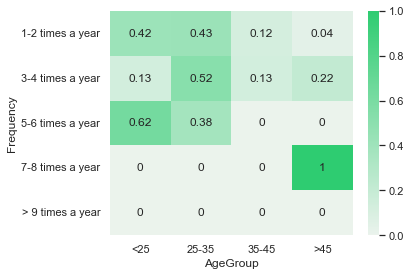

In [53]:
by_age = pd.crosstab(df['Frequency'], df['AgeGroup'], normalize='index', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By education

<AxesSubplot:xlabel='Education', ylabel='Frequency'>

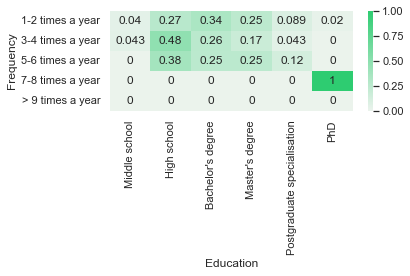

In [54]:
by_education = pd.crosstab(df['Frequency'], df['Education'], normalize='index', dropna=False)
sns.heatmap(by_education, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='Frequency'>

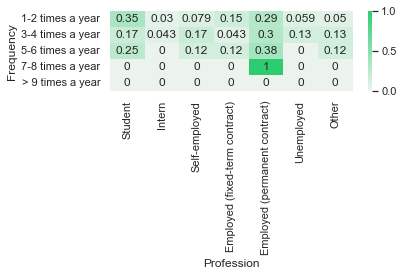

In [55]:
by_profession = pd.crosstab(df['Frequency'], df['Profession'], normalize='index', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='Frequency'>

/Users/Marco/Documents/Noemi/thesis_data_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


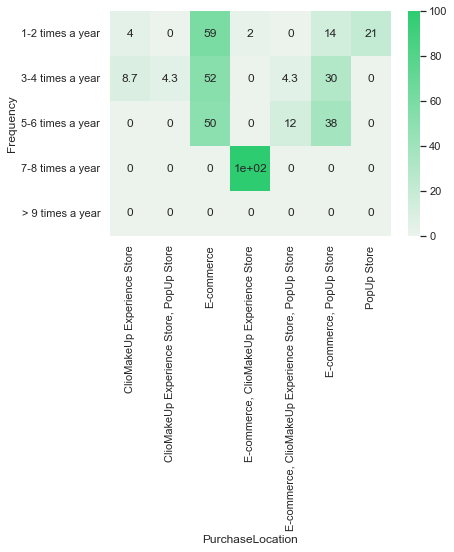

In [56]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['Frequency'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='Frequency'>

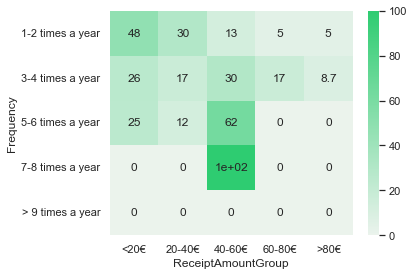

In [57]:
by_receipt = pd.crosstab(df['Frequency'], df['ReceiptAmountGroup'], normalize='index', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='Frequency'>

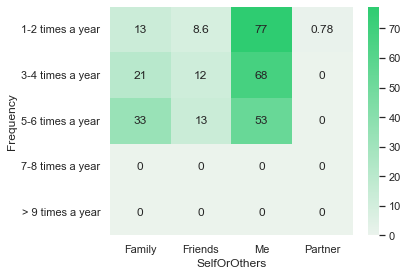

In [58]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['Frequency'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Brand known for

#### Total

<AxesSubplot:>

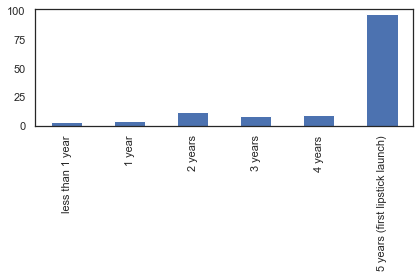

In [59]:
df['BrandKnownFor'].value_counts().sort_index().plot.bar()

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='BrandKnownFor'>

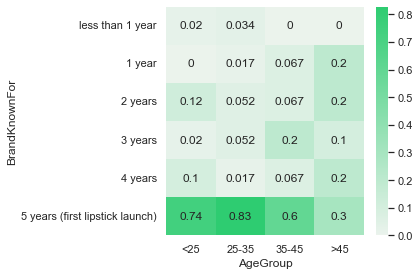

In [60]:
by_age = pd.crosstab(df['BrandKnownFor'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='BrandKnownFor'>

/Users/Marco/Documents/Noemi/thesis_data_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


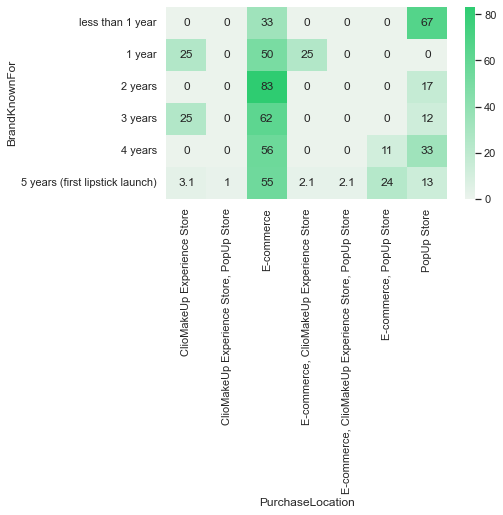

In [61]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['BrandKnownFor'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='BrandKnownFor'>

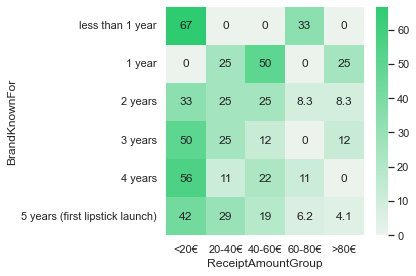

In [62]:
by_receipt = pd.crosstab(df['BrandKnownFor'], df['ReceiptAmountGroup'], normalize='index', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='BrandKnownFor'>

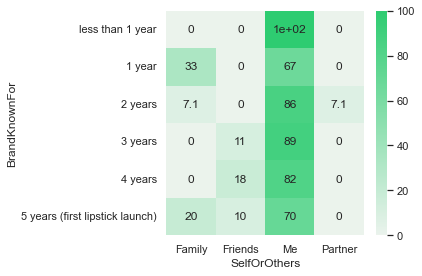

In [63]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['BrandKnownFor'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Receipt amount

#### Total

In [64]:
kwargs = pcfg.bar_kwargs.copy()
kwargs['color'] = pcfg.random_color()
y = df['ReceiptAmountGroup'].value_counts(normalize=True).sort_index() * 100
ax = y.plot.bar(**kwargs)
ax.set_ylabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('res05_receipt')

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='ReceiptAmountGroup'>

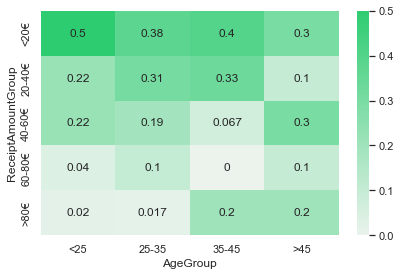

In [65]:
by_age = pd.crosstab(df['ReceiptAmountGroup'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='ReceiptAmountGroup'>

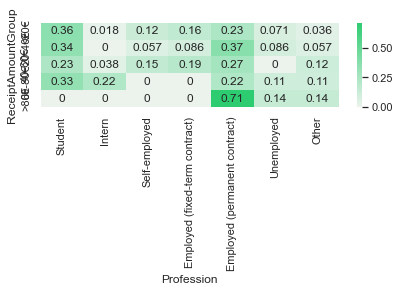

In [66]:
by_profession = pd.crosstab(df['ReceiptAmountGroup'], df['Profession'], normalize='index', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='ReceiptAmountGroup'>

/Users/Marco/Documents/Noemi/thesis_data_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


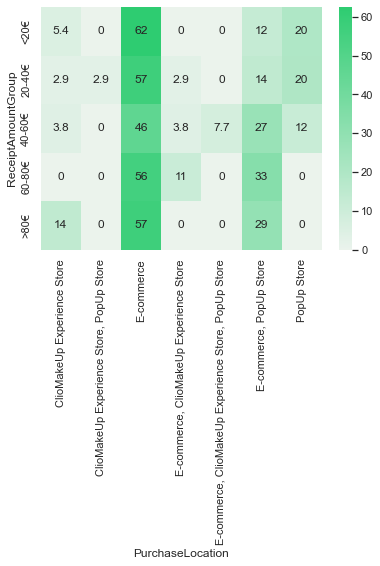

In [67]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['ReceiptAmountGroup'], df_exploded['PurchaseLocation'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='ReceiptAmountGroup'>

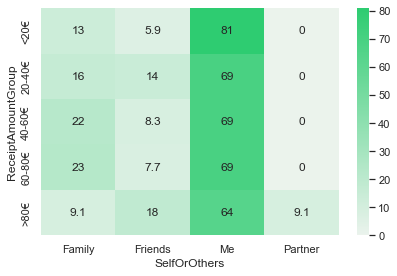

In [68]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['ReceiptAmountGroup'], df_exploded['SelfOrOthers'], normalize='index', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Satisfaction

#### Total

In [69]:
kwargs = dict(pcfg.pie_kwargs)
kwargs['labels'] = None
df['Satisfaction'].value_counts().sort_index().plot.pie(**kwargs)
pcfg.plt.legend(labels=df['Satisfaction'].value_counts().index, bbox_to_anchor=(0.8,0.8), loc='lower left')
pcfg.save_fig('res07_satisfaction')

#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='Satisfaction'>

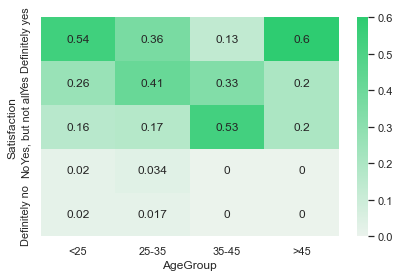

In [70]:
by_age = pd.crosstab(df['Satisfaction'], df['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By profession

<AxesSubplot:xlabel='Profession', ylabel='Satisfaction'>

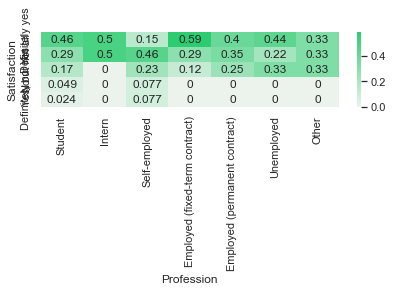

In [71]:
by_profession = pd.crosstab(df['Satisfaction'], df['Profession'], normalize='columns', dropna=False)
sns.heatmap(by_profession, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='Satisfaction'>

/Users/Marco/Documents/Noemi/thesis_data_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


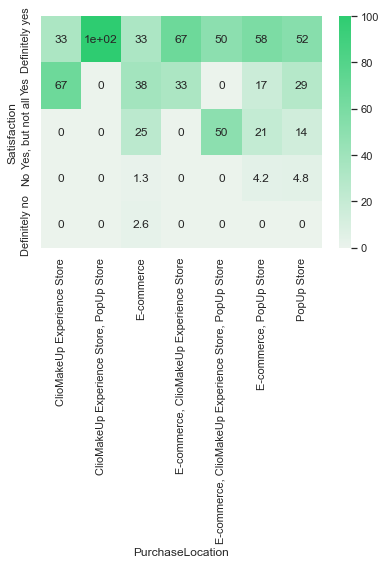

In [72]:
df_exploded = df.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded['Satisfaction'], df_exploded['PurchaseLocation'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

#### By receipt amount

<AxesSubplot:xlabel='ReceiptAmountGroup', ylabel='Satisfaction'>

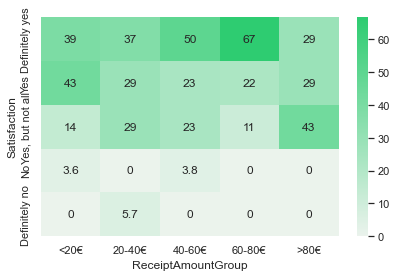

In [73]:
by_receipt = pd.crosstab(df['Satisfaction'], df['ReceiptAmountGroup'], normalize='columns', dropna=False) *100
sns.heatmap(by_receipt, cmap=cmap, annot=True)

#### By recipient

<AxesSubplot:xlabel='SelfOrOthers', ylabel='Satisfaction'>

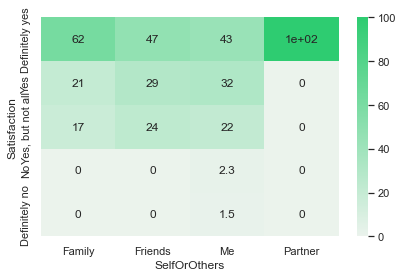

In [74]:
df_exploded = df.explode('SelfOrOthers')
by_recepient = pd.crosstab(df_exploded['Satisfaction'], df_exploded['SelfOrOthers'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Recipient

#### Total

In [75]:
y = df['SelfOrOthers'].value_counts(normalize=True) * 100
print(y)
ax = y.plot.bar(**pcfg.bar_kwargs, color=pcfg.random_color())
ax.set_ylabel('%')
pcfg.hide_spines(ax)
pcfg.save_fig('res08_recipient')

[Me]                     70.454545
[Me, Family]             14.393939
[Me, Friends]             6.818182
[Me, Family, Friends]     6.060606
[Family]                  1.515152
[Me, Partner]             0.757576
Name: SelfOrOthers, dtype: float64


#### By age

<AxesSubplot:xlabel='AgeGroup', ylabel='SelfOrOthers'>

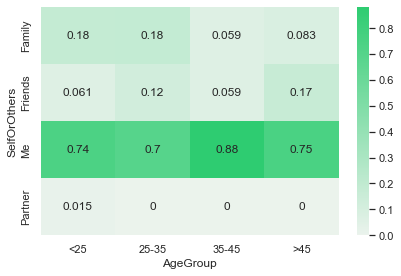

In [76]:
df_exploded = df.explode('SelfOrOthers')
by_age = pd.crosstab(df_exploded['SelfOrOthers'], df_exploded['AgeGroup'], normalize='columns', dropna=False)
sns.heatmap(by_age, cmap=cmap, annot=True)

#### By purchase location

<AxesSubplot:xlabel='PurchaseLocation', ylabel='SelfOrOthers'>

/Users/Marco/Documents/Noemi/thesis_data_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


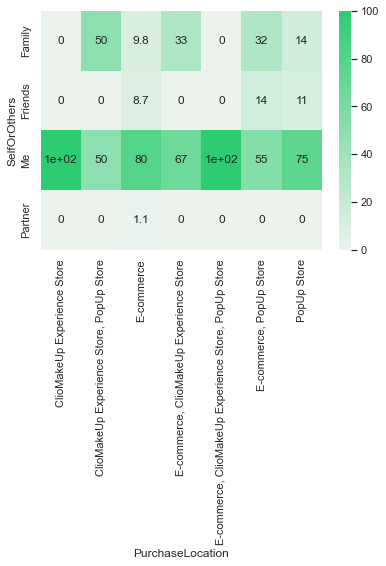

In [77]:
df_exploded = df.explode('SelfOrOthers')
df_exploded1 = df_exploded.explode('PurchaseLocation')
by_recepient = pd.crosstab(df_exploded1['SelfOrOthers'], df_exploded1['PurchaseLocation'], normalize='columns', dropna=False) *100
sns.heatmap(by_recepient, cmap=cmap, annot=True)

### Purchase location

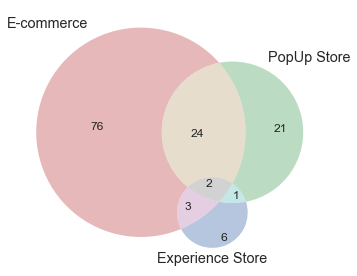

In [78]:
vc_dict = df['PurchaseLocation'].value_counts().to_dict()
v = venn3([
    vc_dict['E-commerce'],
    vc_dict['PopUp Store'],
    vc_dict['E-commerce, PopUp Store'],
    vc_dict['ClioMakeUp Experience Store'],
    vc_dict['E-commerce, ClioMakeUp Experience Store'],
    vc_dict['ClioMakeUp Experience Store, PopUp Store'],
    vc_dict['E-commerce, ClioMakeUp Experience Store, PopUp Store']
    ],
    set_labels = ('E-commerce', 'PopUp Store', 'Experience Store'))

In [79]:
df['PurchaseChannel'].value_counts()
labels = ['Online', 'Offline', 'Both']
channels = [76, 28, 29]

fig, ax = plt.subplots()
ax.pie(channels, labels=labels, autopct='%1.1f%%', startangle=90, colors=pcfg.colors)
pcfg.save_fig('res03_purchase_channels')